# House prices


## Introdction

Demandez à un acheteur de maison de décrire la maison de ses rêves, et il ne commencera probablement pas par la hauteur du plafond du sous-sol ou la proximité d'un chemin de fer est-ouest. Mais le jeu de données de cette compétition de terrains de jeux prouve que beaucoup plus d'influence sur les négociations de prix que le nombre de chambres ou une clôture blanche.

Avec 79 variables explicatives décrivant (presque) tous les aspects des maisons résidentielles à Ames, Iowa, ce concours vous met au défi de prédire le prix final de chaque maison.

## Objectif

Prédir le prix final de chaque logement en fonction des autres variables explicatives
decrivant les aspects des logements résidentiels à Ames, dans l'Iowa.

## Les imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement de données 

In [2]:
submission = pd.read_csv("data/sample_submission.csv")
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

## Exploitation des données

In [3]:
# dimession 
print("la dimesion de submission est", submission.shape)
print("La dimesion de test est", test.shape)
print("La dimesion de train est", train.shape)

la dimesion de submission est (1459, 2)
La dimesion de test est (1459, 80)
La dimesion de train est (1460, 81)


In [4]:
# renomons la première colonne "Id" dans train et test
train = train.rename(columns={train.columns[0]: 'Id'})
test = test.rename(columns={train.columns[0]: 'Id'})

# utilisons la variable Id comme index de notre données 
train = train.set_index('Id')
test = test.set_index('Id')

In [5]:
# Affichons des 5 premières lignes de notre jeu de données 
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Affichons des 5 premières lignes de notre jeu de données 
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Déscription des données 

In [7]:
# Affiche la liste des colonnes de notre données ainsi que leur type respectif
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [8]:
# Affiche les variables numériques de notre données 
numerique = train.select_dtypes(include=[np.number])
print('Les variables numériques sont: \n', numerique.columns)

Les variables numériques sont: 
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [9]:
# Affiche les variables catégorielles de notre données 
categoriel = train.select_dtypes(exclude=[np.number])
print('Les variables numériques sont: \n',categoriel.columns)

Les variables numériques sont: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
# Affiche de la dimension des données: 
print("La dimesion de train est", train.shape)
print("La dimesion de test est", test.shape)

# Affiche des nombres de variable numérique et aussi catégorielles de notre données
print("Nombre de variable numérique est de",sum(np.array(train.dtypes!="object")))
print("Nombre de variable catégorielle est de", sum(np.array(train.dtypes=="object")))

La dimesion de train est (1460, 80)
La dimesion de test est (1459, 79)
Nombre de variable numérique est de 37
Nombre de variable catégorielle est de 43


### Distribution statistique des données 

#### Distribution de la varible cible: 

In [11]:
target = train['SalePrice'].reset_index(drop=True)
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

On peut voir que :
* le prix moyen des logements est de 180921,20 
* le prix minimum est de 34900,00 
* de prix maximal 755000,00 


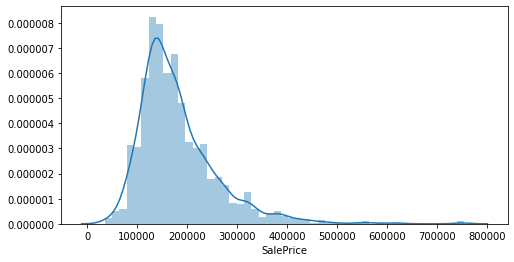

In [12]:
# Pésentation de distribution de la vaiable cible 
plt.figure(figsize=(8,4))
sns.distplot(target);

On peut voir que la distribution de 'SalePrice' est biaisée vers la droite. Transformons-la de manière à ce qu'elle suive une distribution normale gaussienne.

#### Distribution log-transformation 

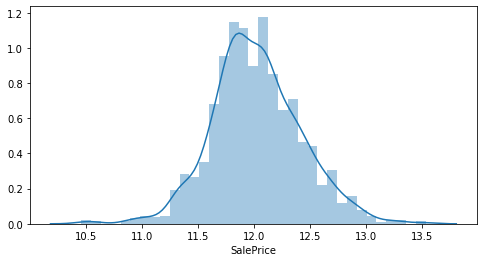

In [13]:
plt.figure(figsize=(8,4))
sns.distplot(np.log(target))

In [14]:
log_SalePrice = np.log(train["SalePrice"])

#### Distribution numérique

In [15]:
# distibution des variables numériques 
numerique.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Distribution catégorielle

In [16]:
# Distribution des variables catégorielles 
categoriel.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


##### Calcul de la moyenne de prix selon le type du logement 

In [17]:
train[['SalePrice', 'SaleType']].groupby(['SaleType'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,SaleType,SalePrice
6,New,274945.418033
2,Con,269600.000000
1,CWD,210600.000000
4,ConLI,200390.000000
8,WD,173401.836622
0,COD,143973.255814
5,ConLw,143700.000000
3,ConLD,138780.888889
7,Oth,119850.000000


##### Calcul de la moyenne de prix selon la qualité des cuisines

In [18]:
train[['SalePrice', 'KitchenQual']].groupby(['KitchenQual'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,KitchenQual,SalePrice
0,Ex,328554.670000
2,Gd,212116.023891
3,TA,139962.511565
1,Fa,105565.205128


##### Calcul de la moyenne de prix selon le type d'habitation

In [19]:
train[['SalePrice', 'BldgType']].groupby(['BldgType'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,BldgType,SalePrice
0,1Fam,185763.807377
4,TwnhsE,181959.342105
3,Twnhs,135911.627907
2,Duplex,133541.076923
1,2fmCon,128432.258065


##### Calcul de la moyenne de prix selon l'annnée de cinstruction du logement 

In [20]:
train[['SalePrice', 'YearBuilt']].groupby(['YearBuilt'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,YearBuilt,SalePrice
111,2010,394432.000000
109,2008,348849.130435
7,1893,325000.000000
6,1892,291250.000000
90,1989,279500.000000
110,2009,269220.000000
96,1995,262194.444444
97,1996,259162.666667
108,2007,255362.734694
107,2006,251775.447761


##### Calcul de la moyenne de prix selon la qualités des matières utilisé 

In [21]:
train[['SalePrice', 'OverallQual']].groupby(['OverallQual'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


## Corrélation 

### Matrice de corrélation entre les variables

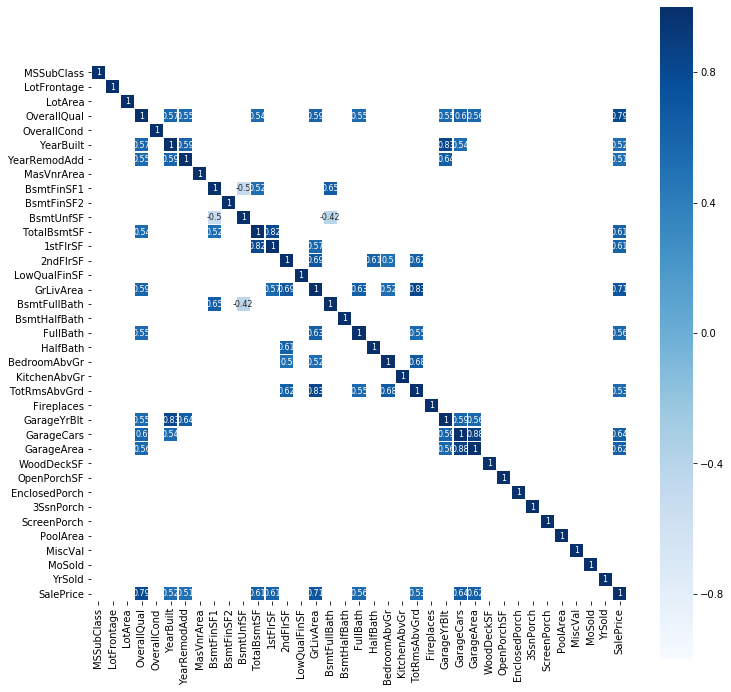

In [22]:
corr = train.corr()
plt.figure(figsize=(12, 12))

#affiche juste ceux qui ont une corrélation supérieur à 0.5
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='Blues', vmax=1.0, vmin=-1.0, linewidths=0.4,
            annot=True, annot_kws={"size": 8}, square=True);

In [23]:
s = corr.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

OverallQual   GarageCars      0.600671
              SalePrice       0.790982
YearBuilt     GarageYrBlt     0.825667
YearRemodAdd  GarageYrBlt     0.642277
BsmtFinSF1    BsmtFullBath    0.649212
TotalBsmtSF   1stFlrSF        0.819530
              SalePrice       0.613581
1stFlrSF      TotalBsmtSF     0.819530
              SalePrice       0.605852
2ndFlrSF      GrLivArea       0.687501
              HalfBath        0.609707
              TotRmsAbvGrd    0.616423
GrLivArea     2ndFlrSF        0.687501
              FullBath        0.630012
              TotRmsAbvGrd    0.825489
              SalePrice       0.708624
BsmtFullBath  BsmtFinSF1      0.649212
FullBath      GrLivArea       0.630012
HalfBath      2ndFlrSF        0.609707
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  2ndFlrSF        0.616423
              GrLivArea       0.825489
              BedroomAbvGr    0.676620
GarageYrBlt   YearBuilt       0.825667
              YearRemodAdd    0.642277
GarageCars    OverallQual



* une forte corrélation entre 'TotalBsmtFS' et '1stFlrSF' et entre 'GarageYrBlt', 'GarageCars' et 'GarageArea' ce qui signifient que les variables 'TotalBsmtFS' et '1stFlrSF' ainsi que 'GarageYrBlt', 'GarageCars' et 'GarageArea' donnent presque les mêmes informations.



* On peut constater que les 9 principales caractéristiques, dont 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd' et 'YearBuilt', sont fortement corrélées avec notre variable cible 'SalePrice'.

### Corrélation avec la variable cible 'SalePrice'

In [24]:
# Calcul de la corrélation entre la variable cible et les variables expliquatives  
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

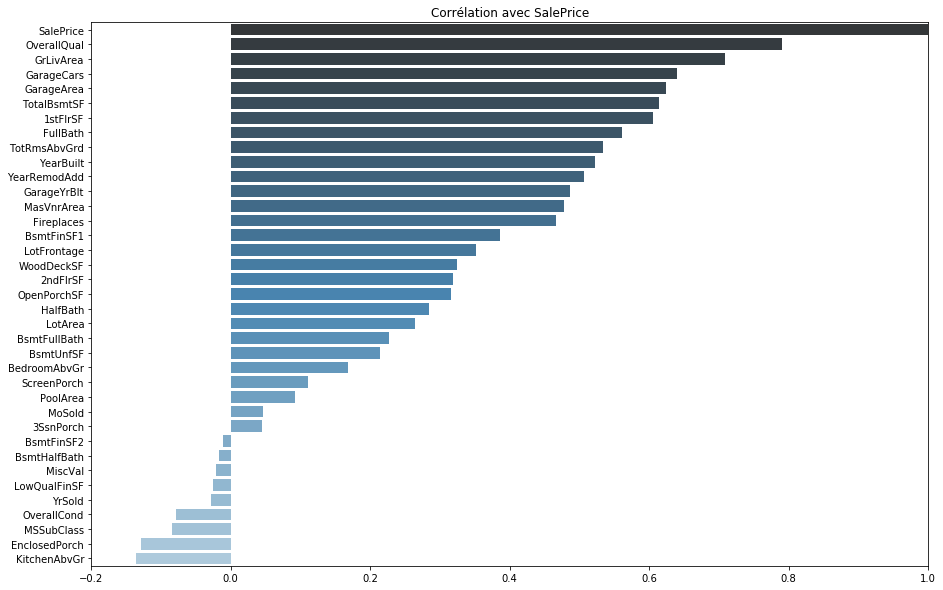

In [25]:
# Affiche de la corrélation entre la variable cible et les autres variables 
data = corr["SalePrice"].sort_values()[::-1]
plt.figure(figsize=(15, 10))
sns.barplot(x=data.values, y=data.index, palette="Blues_d")
plt.title("Corrélation avec SalePrice")
plt.xlim(-0.2, 1)
plt.show()


On constate une forte corrélation entre notre variable cible et : 
* la variable ***'OverallQual'*** : Matière globale et qualité de la finition avec une corrélation = 0.79,
* la variable ***'GrLivArea'*** : Surface habitable au-dessus du sol (sol) pieds carrés avec une corrélation = 0.70,
* la variable ***'GarageCars'*** et aussi la variable ***'GarageArea'*** et vu que les deux variables donnent presque les mêmes information, on peut donc garder qu'une seule. on va garder la variable qui a la corrélation plus élevé. Pareil pour les variables ***'TotalBsmtFS'*** et ***'1stFlrSF'*** on va garder la variables qui a la corrélation plus importante. 



## Nuage de points 

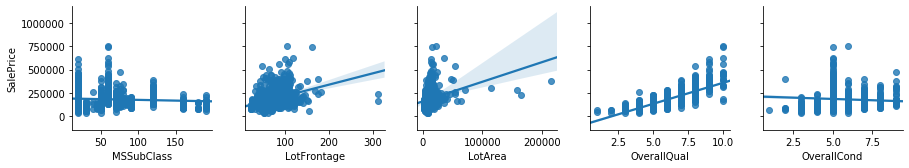

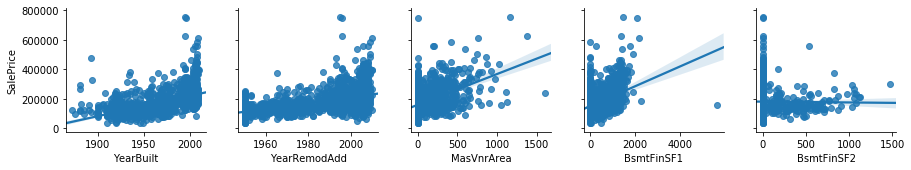

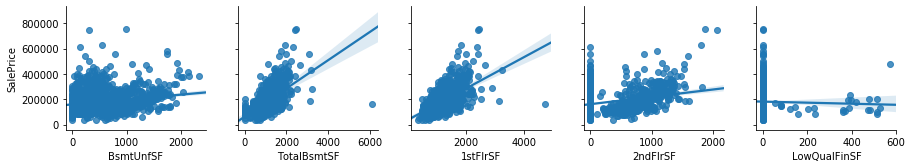

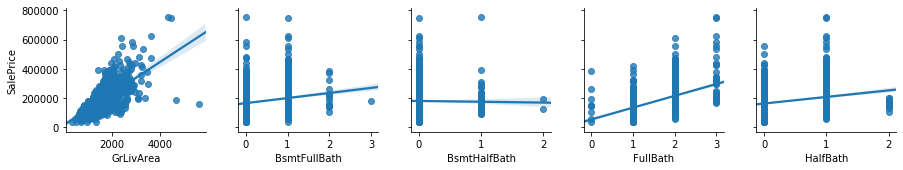

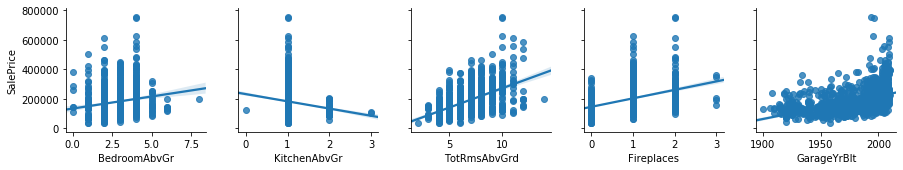

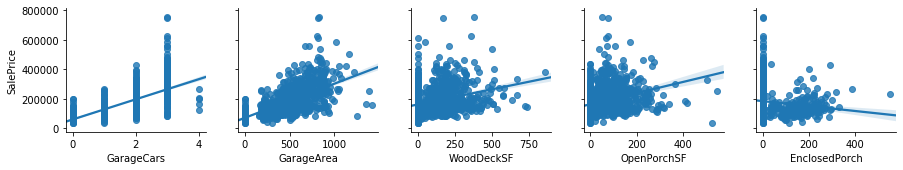

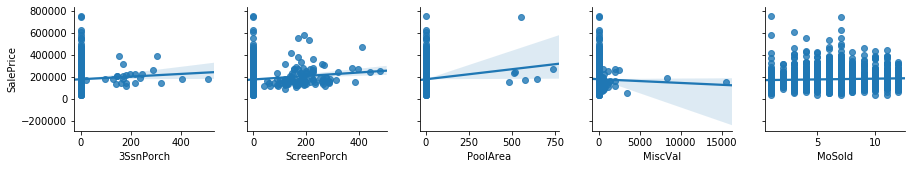

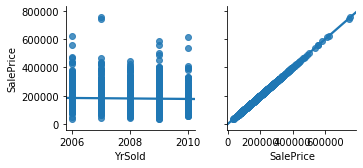

In [26]:
# Affiche les nuage de points entre la variable cible et les variables numériques
for i in range(0, len(numerique.columns), 5):
    sns.pairplot(data=numerique,kind="reg",
                x_vars=numerique.columns[i:i+5],
                y_vars=['SalePrice'])

L'affichage du nuage de point a pour but ici de confirmé ce qu'on a vu sur les corrélation. 
Nous pouvons clairement identifier que les variables ***'TotalBsmtSF'*** , ***'GrLiveArea'*** et ***'1stFlrSF'*** ont une relation linéaire avec la variable ***'SalePrice'***. Ce qui confirme ce qu'on a vu avant. 


Mais aussi pour avoir une vision sur les aberantes. Par exemple pour la variable ***'GrLiveArea'***

## Valeurs abérentes

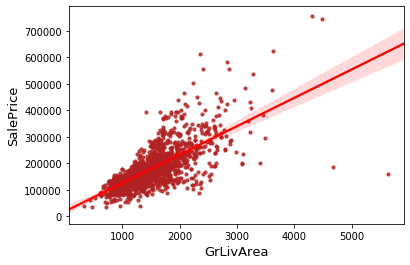

In [27]:
fig, ax = plt.subplots()
ax= sns.regplot(train['GrLivArea'], train['SalePrice'], scatter_kws={"color": "firebrick", 's': 10}, line_kws={"color": "red"})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [28]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

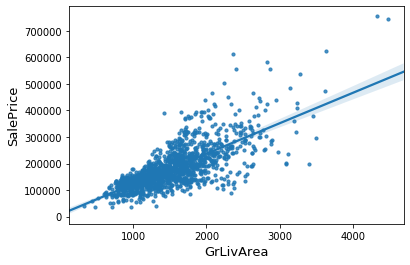

In [29]:
fig, ax = plt.subplots()
ax = sns.regplot(train['GrLivArea'], train['SalePrice'], scatter_kws={'s': 10})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

L'élimination des valeurs aberrantes est toujours sûre. Alors  j'ai décidé de nettoyer manuellement certaines
valeurs aberrantes extrêmes pour un meilleur ajustement. Un diagramme de dispersion montrant la relation entre SalePrice et GrLivArea a été créé et examiné. Il est important de noter que GrLivArea a la plus forte corrélation avec SalePrice parmi les caractéristiques numériques continues. Les deux valeurs aberrantes ont été retirées de l'ensemble de données en toute sécurité

In [30]:
#dimension après traitement abérente 
print('La dimesion de train :',(train.shape))
print('La dimesion de test :',(test.shape))

La dimesion de train : (1458, 80)
La dimesion de test : (1459, 79)


## Valeurs manquantes

### Détections des valeurs manquantes

In [31]:
# Les valeurs maquantes
print('Les valeurs maquantes dans train: \n', train.isnull().any().value_counts())
print('Les valeurs maquantes dans test : \n', test.isnull().any().value_counts())

Les valeurs maquantes dans train: 
 False    61
True     19
dtype: int64
Les valeurs maquantes dans test : 
 False    46
True     33
dtype: int64


D'aprés le resultat, il y a 19
variables avec des valeurs maquantes dans train et 33 dans test

In [32]:
# Affichage des nombres et le pourencetage des valeurs maquantes pour chaque variable de notre données 
total = train.isnull().sum().sort_values(ascending=False)
pourcentage = ((train.isnull().sum()/train.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, pourcentage], axis=1, keys=['Total', 'Pourcentage'])
print('Le nombre et le porcentage des valeurs de chaque variable dans train :\n', 
      missing_data[missing_data['Total'] > 0])


Le nombre et le porcentage des valeurs de chaque variable dans train :
               Total  Pourcentage
PoolQC         1452    99.588477
MiscFeature    1404    96.296296
Alley          1367    93.758573
Fence          1177    80.727023
FireplaceQu     690    47.325103
LotFrontage     259    17.764060
GarageType       81     5.555556
GarageCond       81     5.555556
GarageFinish     81     5.555556
GarageQual       81     5.555556
GarageYrBlt      81     5.555556
BsmtFinType2     38     2.606310
BsmtExposure     38     2.606310
BsmtQual         37     2.537723
BsmtCond         37     2.537723
BsmtFinType1     37     2.537723
MasVnrArea        8     0.548697
MasVnrType        8     0.548697
Electrical        1     0.068587


In [33]:
total = test.isnull().sum().sort_values(ascending=False)
pourcentage = ((test.isnull().sum()/test.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, pourcentage], axis=1, keys=['Total', 'Pourcentage'])
print('Le nombre et le porcentage des valeurs de chaque variable dans test:\n', 
      missing_data[missing_data['Total'] > 0])

Le nombre et le porcentage des valeurs de chaque variable dans test:
               Total  Pourcentage
PoolQC         1456    99.794380
MiscFeature    1408    96.504455
Alley          1352    92.666210
Fence          1169    80.123372
FireplaceQu     730    50.034270
LotFrontage     227    15.558602
GarageCond       78     5.346127
GarageFinish     78     5.346127
GarageYrBlt      78     5.346127
GarageQual       78     5.346127
GarageType       76     5.209047
BsmtCond         45     3.084304
BsmtExposure     44     3.015764
BsmtQual         44     3.015764
BsmtFinType1     42     2.878684
BsmtFinType2     42     2.878684
MasVnrType       16     1.096642
MasVnrArea       15     1.028101
MSZoning          4     0.274160
BsmtHalfBath      2     0.137080
Utilities         2     0.137080
Functional        2     0.137080
BsmtFullBath      2     0.137080
BsmtFinSF2        1     0.068540
BsmtFinSF1        1     0.068540
BsmtUnfSF         1     0.068540
TotalBsmtSF       1     0.068540
Exteri

In [34]:
# regroupement de train et test en df pour faire les traitements de valeurs maquantes
trainX = train.drop('SalePrice', axis =1)
testX = test
y= np.log(train['SalePrice']).reset_index(drop=True)
y_log = np.log1p(train['SalePrice']).reset_index(drop=True)
df = pd.concat([trainX, testX], keys=['train', 'test'])
print('La dimesion de test :',(df.shape))

La dimesion de test : (2917, 79)


#### Séparations des variables selon leur type

In [35]:
variables_nom = ['Alley','BedroomAbvGr','BldgType','BsmtFullBath','BsmtHalfBath','Condition1','Condition2','Electrical',
                'Exterior1st','Exterior2nd','Fireplaces','Foundation','FullBath','GarageCars','GarageType','HalfBath',
                'Heating','HouseStyle','KitchenAbvGr','LandContour','LotConfig','MasVnrType','MiscFeature','MSZoning',
                'Neighborhood','RoofMatl','RoofStyle','SaleCondition','SaleType','Street','TotRmsAbvGrd']

In [36]:
variables_ord = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir','ExterCond',
                'ExterQual','Fence','FireplaceQu','Functional','GarageCond','GarageFinish','GarageQual','HeatingQC',
                'KitchenQual','LandSlope','LotShape','OverallCond','OverallQual','PavedDrive','PoolQC','Utilities']

In [37]:
variables_num = ['1stFlrSF','2ndFlrSF','3SsnPorch','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','EnclosedPorch','GarageArea',
                'GarageYrBlt','GrLivArea','LotArea','LotFrontage','LowQualFinSF','MSSubClass','MasVnrArea','MiscVal',
                'MoSold','OpenPorchSF','PoolArea','ScreenPorch','TotalBsmtSF','WoodDeckSF','YearBuilt','YearRemodAdd',
                'YrSold']

#### Conversion des variables classés numérique mais en varibale ordinale

- MSSubClass : La classe de l'immeuble
- MoSold : Mois de vente
- YrSold : Année de vente

In [38]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

#### Imputation avec mode

In [39]:
# variable Functional
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

# variable Electrical
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0]) 

# variable KitchenQual
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

# variable Exteiror1st 
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

# variable Exterior2nd
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

# variable SaleType
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

# variable MSZoning
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

# variable LotFrontage
df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### Imputation supllémentaire 

In [40]:
# variable PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')

# variable MiscFeature: 
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# variable Alley
df['Alley'] = df['Alley'].fillna('None')

# variable Fence
df['Fence'] = df['Fence'].fillna('None')

# variable FireplaceQU
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# variables : GarageType, GarageFinish, GarageQual, GarageCond
for x in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[x] = df[x].fillna('None')

# variables GarageArea et GarageCars
for x in ('GarageArea', 'GarageCars'):
    df[x] = df[x].fillna(0)

# variables : BsmtFinType2, BsmtExposure, BsmtFinType1 et BsmtCond
for x in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df[x] = df[x].fillna('None')

# variables : BsmtFinSF1, BSmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath et BsmtHalfBath 
#les valeurs manquantes sont nulles pour les personnes n'ayant pas de sous-sol
for x in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[x] = df[x].fillna(0)

# variable GarageYrBlt
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('None')

# variable MaxVnrType et  MasVnrArea
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# variable MSSubClass
df['MSSubClass'] = df['MSSubClass'].fillna("None")

# variable dans test: Utilities
df = df.drop(['Utilities'], axis=1)

In [41]:
# Vérification 
df.isnull().any().value_counts()

False    78
dtype: int64

## Nouvelles variables

In [42]:
# total de SF
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# total du porche
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

print(' La dimesion de df : ',(df.shape))

 La dimesion de df :  (2917, 80)


Comme les caractéristiques de surface sont très importantes pour déterminer le prix des maisons, nous ajoutons une caractéristique supplémentaire qui est la surface totale du sous-sol, du premier et du deuxième étage de chaque maison

## Etiquetage des variables ordinale

In [43]:
from sklearn.preprocessing import LabelEncoder

variables_ord = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir','ExterCond',
                'ExterQual','Fence','FireplaceQu','Functional','GarageCond','GarageFinish','GarageQual','HeatingQC',
                'KitchenQual','LandSlope','LotShape','OverallCond','OverallQual','PavedDrive','PoolQC', 'Alley', 
                'MSSubClass', 'YrSold', 'MoSold']

# les traiments s'appliquer sur toutes les variables ordinales 
for x in variables_ord:
    label = LabelEncoder() 
    label.fit(list(df[x].values))
    df[x] = label.transform(list(df[x].values))
print('La dimesion de df : ',df.shape)

La dimesion de df :  (2917, 80)


## L'asymétrie des variables 

<Figure size 1440x1440 with 0 Axes>

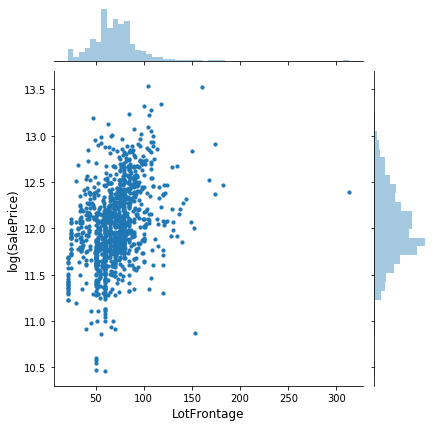

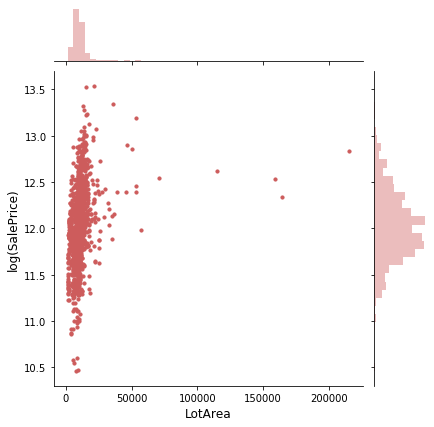

In [44]:
plt.figure(figsize=(20,20))
g1 = sns.jointplot(trainX['LotFrontage'],y_log, s = 10)
g1.set_axis_labels('LotFrontage', 'log(SalePrice)', fontsize=12)
g2 = sns.jointplot(trainX['LotArea'],y_log, s = 10, color="indianred")
g2.set_axis_labels('LotArea', 'log(SalePrice)', fontsize=12)

### Vérifier l'asymétrie de toutes les variables numériques

In [45]:
from scipy.special import boxcox1p
from scipy.stats import norm, skew

In [46]:
#selection de toutes les variabes numériques
var_num = df.dtypes[df.dtypes != "object"].index

In [47]:
skewed_features = df[var_num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [48]:
skewness = skewness[abs(skewness) > 0.75]
print("Il y a {} de variables biaisées".format(skewness.shape[0]))
skewed_feats = skewness.index

lam = 0.15
for x in skewed_feats:
    df[x] = boxcox1p(df[x], lam)
    df[x] += 1

Il y a 58 de variables biaisées


In [49]:
skewness.shape[0]

58

In [50]:
# réaffectation 
trainX = df[:1458]

#### Distribution après log-transofrmation

<Figure size 1440x1440 with 0 Axes>

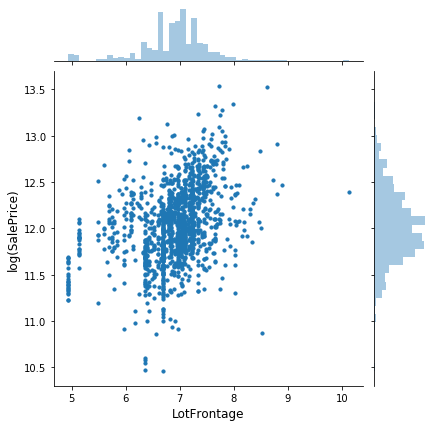

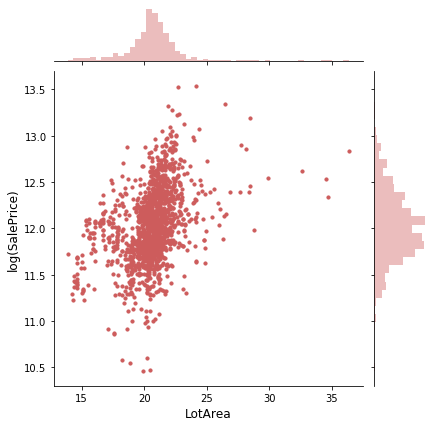

In [51]:
plt.figure(figsize=(20,20))
g1 = sns.jointplot(trainX['LotFrontage'],y_log, s = 10)
g1.set_axis_labels('LotFrontage', 'log(SalePrice)', fontsize=12)

g2 = sns.jointplot(trainX['LotArea'],y_log, color="indianred", s = 10)
g2.set_axis_labels('LotArea', 'log(SalePrice)', fontsize=12)

In [52]:
df = pd.get_dummies(df, drop_first = True).reset_index(drop=True)
print(df.shape)

(2917, 303)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 303 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(58), uint8(245)
memory usage: 2.0 MB


## Modèles 

#### Importation des librairies

In [54]:
import statistics
import warnings
import sklearn.model_selection as ms
from scipy.stats import norm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

%matplotlib inline
warnings.filterwarnings('ignore')

In [55]:
X = df.iloc[:len(y),:]
test = df.iloc[len(X):,:]
print('train', X.shape, 'y', y.shape, 'test', test.shape)

train (1458, 303) y (1458,) test (1459, 303)


#### Préparation des jeux de données

* Créer un jeu d'apprentissage (80%) et un jeu de validation (2O%)
* Séparer la cible du reste des données

Variables à créer: X_train, y_train, X_test, y_test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 34)

In [57]:
#stratify_divide = StratifiedKFold(n_splits=10, shuffle=True, random_state=99)

In [58]:
#kf = KFold(n_splits = 5, shuffle = True, random_state = 28)

In [59]:
#def rmse_cv(model):
#   kf = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train)
#    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
#    return(rmse)

Ici, enfin, nous allons réellement adapter notre modèle et évaluer ses performances ! Comme mentionné ci-dessus, nous utiliserons **GridSearchCV** avec le modèle lasso regression et ElasticNet.

### Lasso

In [60]:
lasso = linear_model.Lasso(normalize = True)
lasso = lasso.set_params(random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=42, selection='cyclic',
      tol=0.0001, warm_start=False)

#### GridSearch avec Lasso 

In [61]:
#Préciser les valeurs à essayer pour chaque hyperparamètre
param_grid_lasso = {"max_iter": [5, 10, 20],
                     "alpha": 100**np.linspace(10,-2,1000)*0.5}  

In [62]:
# création d'une grille hyperparametre
grid_search_lasso = ms.GridSearchCV(lasso, param_grid_lasso, scoring= 'neg_mean_squared_error', 
                                    cv=KFold(n_splits = 5, shuffle = True, random_state = 28), n_jobs=-1, return_train_score = True)

%time grid_search_lasso.fit(X_train, y_train)

CPU times: user 30.8 s, sys: 4.69 s, total: 35.5 s
Wall time: 1min 59s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000000e+19, 4.73092410...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [63]:
# obtenir les meilleurs paramètres
grid_search_lasso.best_params_

{'alpha': 0.00014302977675878753, 'max_iter': 20}

In [64]:
# Prédiction à l'aide des paramètres ajustés
grid_lasso = grid_search_lasso.best_estimator_

In [65]:
#affichage des scors pour train et test 
print("R^2 de train : ",grid_lasso.score(X_train, y_train))
print("R^2 de test : ",grid_lasso.score(X_test, y_test))

R^2 de train :  0.9268193464911959
R^2 de test :  0.93392719120137


Le score R2 de notre modèle est de 0,93! Autrement dit, notre modèle explique près de 93% de la variation du prix de vente dans les données test, sur lesquelles il ne s'est pas entraîné. Il n'y a pas de preuve de surcharge, car le score de formation est inférieur au score du test, autour de 0,92. Ce résultat est bien supérieur à la performance de base de la régression. Du point de vue de la précision, il s'agit d'un modèle solide. Examinons maintenant certains des coefficients de caractéristiques.


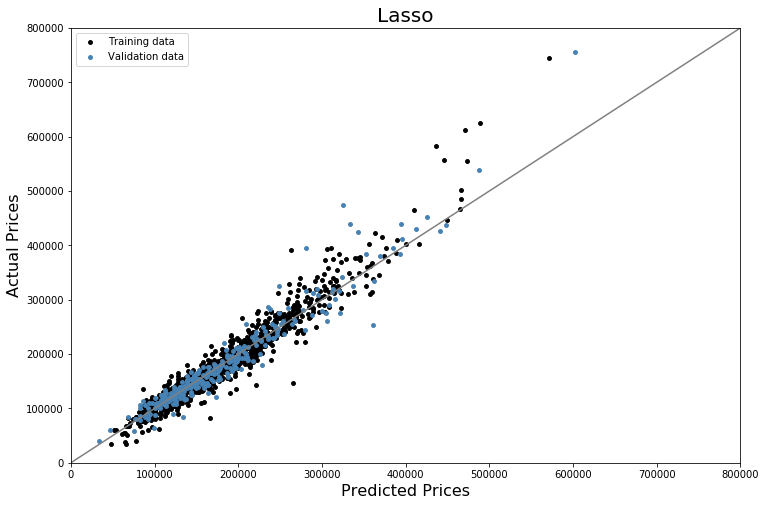

In [66]:
y_train_lasso = grid_lasso.predict(X_train)
y_test_lasso = grid_lasso.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_lasso), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_lasso), np.expm1(y_test), c='steelblue', marker='o', s=15, label = "Validation data")
plt.title("Lasso", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [67]:
# Influence des variables sur la prédiction
coeff = pd.DataFrame({"variable":X_train.columns,"coeff":grid_lasso.coef_})
coeff = coeff.sort_values(by = 'coeff', ascending = False)

print(coeff[coeff.coeff>0].shape)
coeff[coeff.coeff>0]

(53, 2)


,variable,coeff
8,YearBuilt,1.080592
9,YearRemodAdd,0.346329
6,OverallQual,0.191680
7,OverallCond,0.182423
27,GrLivArea,0.115586
40,GarageCars,0.100220
91,Neighborhood_StoneBr,0.081734
75,Neighborhood_Crawfor,0.075034
295,SaleType_New,0.068727
282,GarageYrBlt_2009.0,0.067771


## ElasticNet

In [68]:
eNet = linear_model.ElasticNet(normalize = True)
eNet.set_params(random_state=12)
eNet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=12, selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
#parametres 
param_grid_eNet = {"max_iter": [5, 10, 20],
                    "alpha": 100**np.linspace(10,-2,1000)*0.5,
                    "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [71]:
grid_search_eNet = ms.GridSearchCV(eNet, param_grid_eNet, scoring= 'neg_mean_squared_error', 
                                   cv= KFold(n_splits = 5, shuffle = True, random_state = 28), n_jobs=-1, return_train_score = True)

%time grid_search_eNet.fit(X_train, y_train)

CPU times: user 5min 27s, sys: 44.6 s, total: 6min 12s
Wall time: 22min 20s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=12, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000...
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
  

In [72]:
# get the best parameters
grid_search_eNet.best_params_

{'alpha': 0.00015976237528796133, 'l1_ratio': 0.8, 'max_iter': 20}

In [73]:
# Prediction using the tuned parameters
grid_eNet = grid_search_eNet.best_estimator_

In [74]:
print( "R^2 de train : ",grid_eNet.score(X_train, y_train))
print("R^2 de test : ",grid_eNet.score(X_test, y_test))

R^2 de train :  0.9285392855330232
R^2 de test :  0.9363640261923709


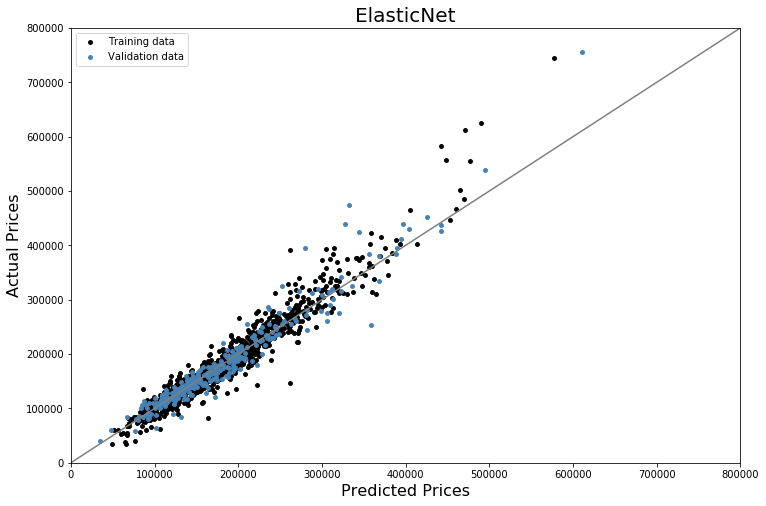

In [75]:
y_train_eNet = grid_eNet.predict(X_train)
y_test_eNet = grid_eNet.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_eNet), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_eNet), np.expm1(y_test), c='steelblue', marker='o', s=15, label = "Validation data")
plt.title("ElasticNet", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [76]:
# Influence des variables sur la prédiction
coeff = pd.DataFrame({"variable":X_train.columns,"coeff":grid_eNet.coef_})
coeff = coeff.sort_values(by = 'coeff', ascending = False)

print(coeff[coeff.coeff>0].shape)
coeff[coeff.coeff>0]

(63, 2)


,variable,coeff
8,YearBuilt,0.743519
9,YearRemodAdd,0.409265
6,OverallQual,0.176904
7,OverallCond,0.166981
40,GarageCars,0.095794
27,GrLivArea,0.091846
91,Neighborhood_StoneBr,0.086567
75,Neighborhood_Crawfor,0.073739
84,Neighborhood_NoRidge,0.071438
282,GarageYrBlt_2009.0,0.070039
